In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import sigmaclip

In [3]:
cat = np.genfromtxt('/Volumes/Spare Data/photRun0520/drcPhot10Nov/catDir_TUCANA-II-SE/TUCANA-II_fullCat_ALL.dat',
                    names=True)

In [4]:
# cat.dtype.names

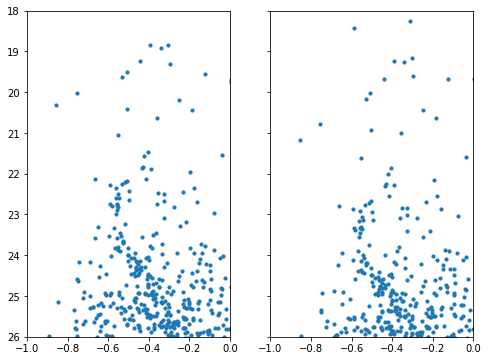

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,6),sharey=True,sharex=True)

ax1.scatter(cat['magr_f606w']-cat['magr_f814w'],cat['magr_f606w'],s=10)
ax2.scatter(cat['magr_f606w']-cat['magr_f814w'],cat['magr_f814w'],s=10)

ax1.set_ylim(26,18)
ax2.set_xlim(-1.,0)

plt.show()

In [6]:
idx = np.logical_and(np.logical_and(cat['magr_f606w']-cat['magr_f814w']<-0.3,
                                    cat['magr_f606w']-cat['magr_f814w']>-0.7),
                     np.logical_and(cat['magr_f606w']<23,cat['magr_f606w']>21))

In [7]:
catC1 = cat[idx]

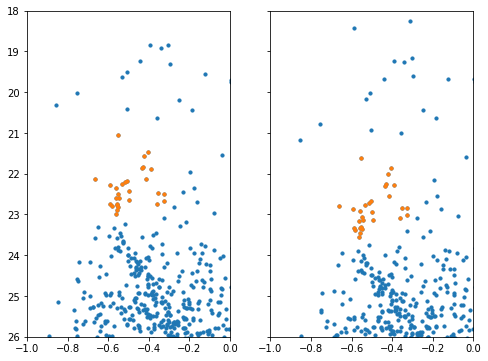

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,6),sharey=True,sharex=True)

ax1.scatter(cat['magr_f606w']-cat['magr_f814w'],cat['magr_f606w'],s=10)
ax2.scatter(cat['magr_f606w']-cat['magr_f814w'],cat['magr_f814w'],s=10)

ax1.scatter(catC1['magr_f606w']-catC1['magr_f814w'],catC1['magr_f606w'],s=10)
ax2.scatter(catC1['magr_f606w']-catC1['magr_f814w'],catC1['magr_f814w'],s=10)

ax1.set_ylim(26,18)
ax2.set_xlim(-1.,0)

plt.show()

In [9]:
 clipped = sigmaclip(catC1['stdev_f606w'],3,3)

In [10]:
print(len(catC1),len(clipped[0]))

29 27


In [16]:
med = np.median(clipped[0])
corr = med/np.sqrt(3)
print(1.0875/corr)
print(1/corr)

453.88078391112134
417.36164037804264


In [12]:
sDb6 = catC1['final_phot_f606w']/catC1['aper_bkg_f606w']

In [13]:
cl2 = sigmaclip(sDb6,3,3)

In [14]:
med2 = np.median(cl2[0])
print(med2)

184.80681926561755


In [17]:
len(cl2[0])

29

In [15]:
sDb8 = catC1['final_phot_f814w']/catC1['aper_bkg_f814w']
cl3 = sigmaclip(sDb8,3,3)
med3 = np.median(cl3[0])
print(med3)

185.8489804687983
